In [1]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
titanic_df = pd.read_csv("traindata.csv", dtype={"Age": np.float64},)
test_df = pd.read_csv("testdata.csv", dtype={"Age": np.float64},)

#preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# A cool way to split output!

titanic_df.info()
print "----------------------"
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare      

In [4]:
titanic_df = titanic_df.drop(['Name','Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

EMBARKED 

In [5]:
# fill two missing values with most occurred value, which is S

titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

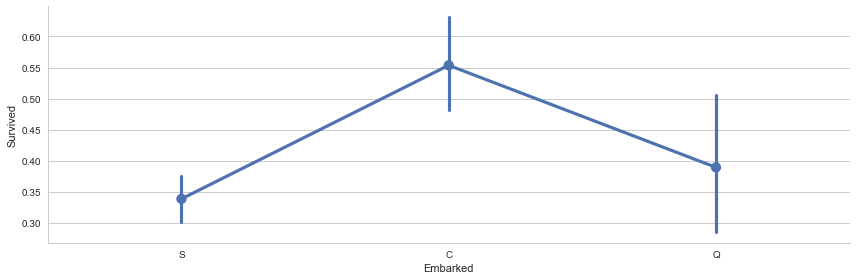

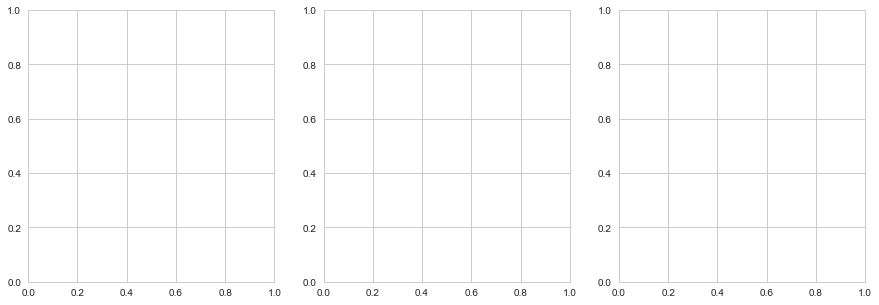

In [6]:
# plot

sns.factorplot('Embarked','Survived', data=titanic_df, size=4, aspect=3)

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(15,5))

In [7]:
# for more information on seaborn countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# define and groupby embarked, and get the mean for survived passnegers for each values in embarked

embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S', 'C', 'Q'],ax=axis3)

In [8]:
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

In [9]:
embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

In [10]:
titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

In [11]:
titanic_df.drop(["Embarked"], axis=1, inplace = True)
test_df.drop(["Embarked"], axis=1, inplace = True)

FARE

In [12]:
# fare

# only for test_df, since there is a missing Fare value

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [13]:
# convert from float to int

titanic_df["Fare"]= titanic_df["Fare"].astype(int)
test_df["Fare"]= titanic_df["Fare"].astype(int)

In [14]:
# Assign fare for survived & didnt survive passengers

fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df["Fare"][titanic_df["Survived"] == 1]

In [15]:
# Assign average and STD for fare of survived / did not survive passengers

average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

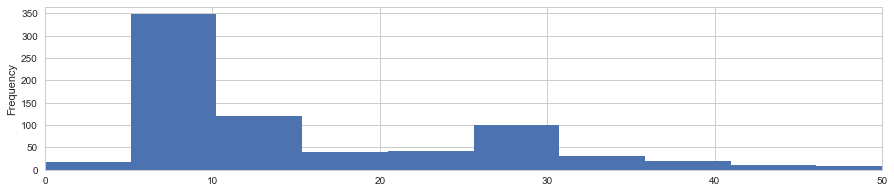

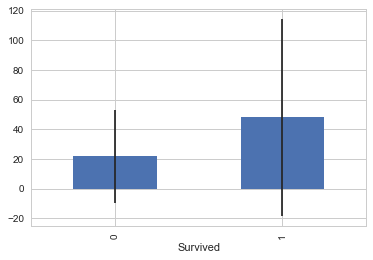

In [16]:
# plot

titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50))

average_fare.index.names= std_fare.index.names = ["Survived"]

average_fare.plot(yerr=std_fare, kind='bar', legend=False)

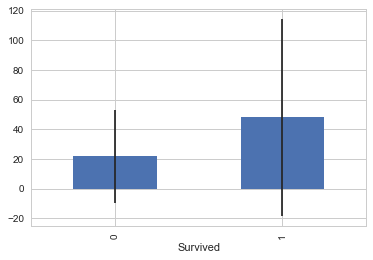

In [17]:
average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

AGE

/Users/alexisrodich/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alexisrodich/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


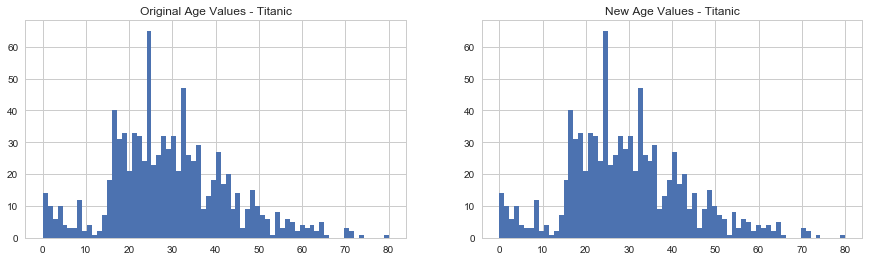

In [20]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

# get average, std, number of NaN values in titanic

average_age_titanic = titanic_df["Age"].mean()
std_age_titanic = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of  NaN values in test_df

average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# get average, std, and number of  NaN values in test_df

average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std ) & (mean + std)

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# Fill NaN values in age column with random values generated

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int

titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

# plot original Age values 

titanic_df['Age'].hist(bins=70, ax=axis1)

# plot new Age values NOTE: What is the difference? 

titanic_df['Age'].hist(bins=70, ax= axis2)


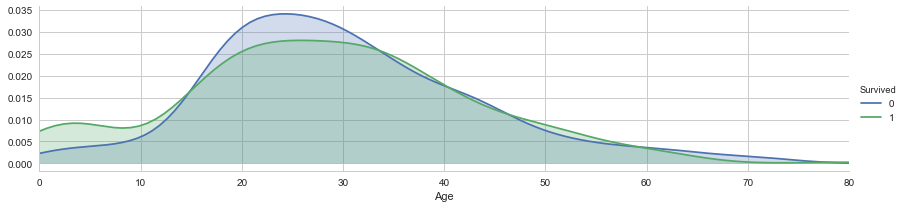

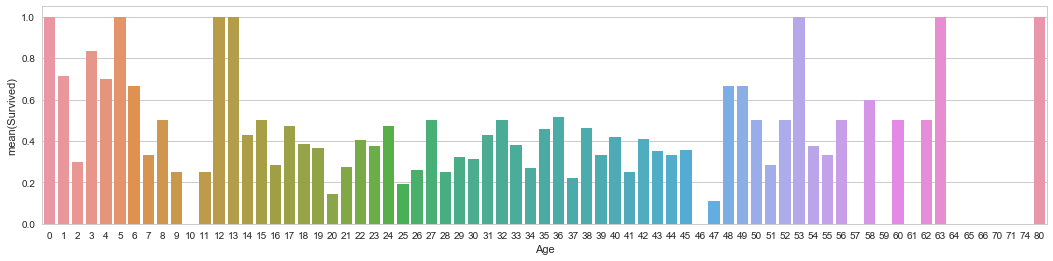

In [21]:
# peaks for survived / not survived passengers by their age 

facet = sns.FacetGrid(titanic_df,hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age 

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

Cabin

In [22]:
titanic_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

Family

/Users/alexisrodich/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0x1190d2350>, <matplotlib.text.Text at 0x11bf6a590>]

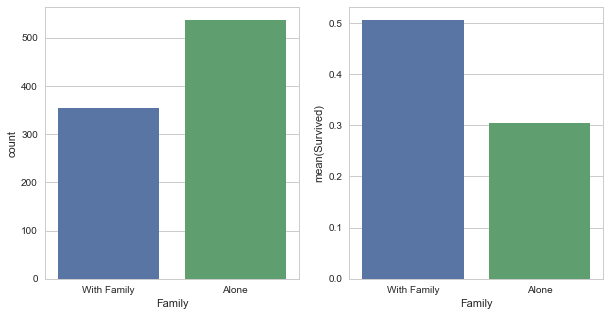

In [23]:
# combine Parch & SibSp
# we can have only one column represent if the passenger had any family aboard; and if so, whether having a family member increases chance of survival

titanic_df['Family'] = titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family']> 0] = 1
titanic_df['Family'].loc[titanic_df['Family']== 0] = 0

test_df['Family'] = test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family']> 0] = 1
test_df['Family'].loc[test_df['Family']== 0] = 0

#drop Parch & SibSp

titanic_df = titanic_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

#plot
fig, (axis1, axis2) = plt.subplots(1,2, sharex=True, figsize=(10,5))

sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average survived for those who had / didnt have family member

family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family", "Alone"], rotation=0)


Sex

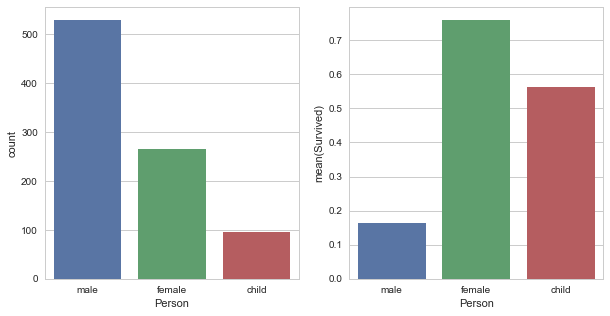

In [24]:
# classify passengers as males, females, and child

def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person,axis=1)
test_df['Person'] = test_df[['Age', 'Sex']].apply(get_person,axis=1)

# no need to use sex column since we created Person column

titanic_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has teh Lowerst average of survived passengers

person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Male', 'Female', 'Child']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Male', 'Female', 'Child']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person', data=titanic_df, kind='count', ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person (male, female or child)

family_perc = titanic_df[["Person", "Survived"]].groupby(['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=family_perc, ax=axis2, order=['male', 'female', 'child'])

titanic_df.drop(['Person'], axis=1, inplace=True)
test_df.drop(['Person'], axis=1, inplace=True)


Passenger Class

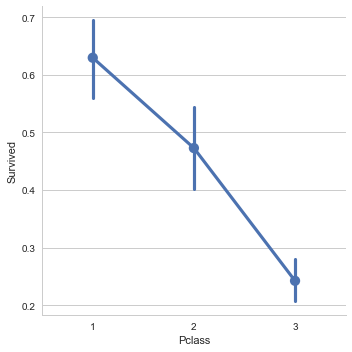

In [25]:
# sns.factorplot('Pclass', data=titanic_df, kind='count',order=[1,2,3])
sns.factorplot('Pclass', 'Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column and drop 3rd class as it has the lowest average of survived passengers

pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_test)

In [26]:
# Define Training and Test Sets

X_train = titanic_df.drop("Survived", axis=1)
Y_train = titanic_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

Regression

In [28]:
# Logistic Regression 

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

ValueError: X has 9 features per sample; expecting 10